In [8]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import eli5

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


plt.style.use('classic')

In [4]:
df = pd.read_csv('data/processed.csv')

In [7]:
df.head()

,repo,language,readme,words,lang_freq
0,/apple/swift,C++,img src https swift org asset imag swift svg a...,1260,100
1,/openalpr/openalpr,C++,openalpr openalpr open sourc automat licens pl...,622,100
2,/tensorflow/tensorflow,C++,div align center img src https www tensorflow ...,1216,100
3,/wjakob/pybind11,C++,pybind logo https github com pybind pybind raw...,610,100
4,/Polytonic/Chlorine,C++,chlorin http polyton github io chlorin build s...,624,100


Bag of Words

In [10]:
cv = CountVectorizer()
bag_of_words = cv.fit_transform(df.readme)

In [11]:
bag_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [12]:
cv.get_feature_names()

['aa',
 'aaa',
 'aaaa',
 'aaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaa',
 'aaaaaaaacn',
 'aaaaaavvvvvxxxxxtttt',
 'aaaab',
 'aaaabbbbcccc',
 'aaaacc',
 'aaaaoooooo',
 'aaabf',
 'aaad',
 'aaaffaaaa',
 'aab',
 'aabc',
 'aabqxjyv',
 'aac',
 'aacaf',
 'aacanakin',
 'aacb',
 'aaccess',
 'aacigyxew',
 'aad',
 'aadadd',
 'aadc',
 'aadvic',
 'aae',
 'aaf',
 'aafb',
 'aaff',
 'aagtorr',
 'aagxjzrqm',
 'aah',
 'aalen',
 'aan',
 'aandroid',
 'aanze',
 'aap',
 'aapcmdackhlfobmkcpplkjpfceihngkh',
 'aapl',
 'aaplhn',
 'aaqobk',
 'aar',
 'aarch',
 'aaron',
 'aarono',
 'aaronpearc',
 'aaronrandal',
 'aaronsw',
 'aaronvb',
 'aarsaeth',
 'aas',
 'ab',
 'aba',
 'ababc',
 'abacus',
 'abandon',
 'abb',
 'abbaswasim',
 'abbba',
 'abbc',
 'abber',
 'abbr',
 'abbrev',
 'abbrevi',
 'abc',
 'abd',
 'abdol',
 'abe',
 'abeginn',
 'abeiv',
 'abel',
 'abelhadigit',
 'aberr',
 'abf',
 'abfa',
 'abfc',
 'abffb',
 'abhigupta',
 'abhik',
 'abhinav',
 'abi',
 'abid',
 'abil',
 'abilita',
 'abl',
 'ablad',
 'a

In [15]:
cv.vocabulary_

{'img': 12394,
 'src': 25508,
 'https': 11951,
 'swift': 26274,
 'org': 19426,
 'asset': 1565,
 'imag': 12334,
 'svg': 26237,
 'alt': 820,
 'logo': 15546,
 'height': 11476,
 'program': 21210,
 'languag': 14565,
 'architectur': 1366,
 'main': 15921,
 'packag': 19681,
 'maco': 15855,
 'build': 3193,
 'status': 25698,
 'ci': 4143,
 'job': 13579,
 'oss': 19494,
 'increment': 12504,
 'ra': 21904,
 'lastcompletedbuild': 14599,
 'badg': 1979,
 'icon': 12156,
 'ubuntu': 28080,
 'linux': 15289,
 'cento': 3798,
 'amazon': 858,
 'communiti': 4738,
 'host': 11811,
 'platform': 20600,
 'os': 19455,
 'github': 10451,
 'com': 4681,
 'appl': 1249,
 'continu': 4978,
 'integr': 12763,
 'blob': 2722,
 'node': 18333,
 'ppc': 20903,
 'le': 14727,
 'json': 13745,
 'extern': 8466,
 'aarch': 45,
 'docker': 6936,
 'android': 969,
 'lts': 15716,
 'armv': 1433,
 'arm': 1424,
 'window': 29819,
 'vs': 29319,
 'welcom': 29658,
 'high': 11618,
 'perform': 20165,
 'system': 26463,
 'clean': 4278,
 'modern': 17025,
 '

In [16]:
tfid = TfidfVectorizer()
bag_of_words = tfid.fit_transform(df.readme)

In [18]:
bag_of_words.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
tfid.get_feature_names()

['aa',
 'aaa',
 'aaaa',
 'aaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaa',
 'aaaaaaaacn',
 'aaaaaavvvvvxxxxxtttt',
 'aaaab',
 'aaaabbbbcccc',
 'aaaacc',
 'aaaaoooooo',
 'aaabf',
 'aaad',
 'aaaffaaaa',
 'aab',
 'aabc',
 'aabqxjyv',
 'aac',
 'aacaf',
 'aacanakin',
 'aacb',
 'aaccess',
 'aacigyxew',
 'aad',
 'aadadd',
 'aadc',
 'aadvic',
 'aae',
 'aaf',
 'aafb',
 'aaff',
 'aagtorr',
 'aagxjzrqm',
 'aah',
 'aalen',
 'aan',
 'aandroid',
 'aanze',
 'aap',
 'aapcmdackhlfobmkcpplkjpfceihngkh',
 'aapl',
 'aaplhn',
 'aaqobk',
 'aar',
 'aarch',
 'aaron',
 'aarono',
 'aaronpearc',
 'aaronrandal',
 'aaronsw',
 'aaronvb',
 'aarsaeth',
 'aas',
 'ab',
 'aba',
 'ababc',
 'abacus',
 'abandon',
 'abb',
 'abbaswasim',
 'abbba',
 'abbc',
 'abber',
 'abbr',
 'abbrev',
 'abbrevi',
 'abc',
 'abd',
 'abdol',
 'abe',
 'abeginn',
 'abeiv',
 'abel',
 'abelhadigit',
 'aberr',
 'abf',
 'abfa',
 'abfc',
 'abffb',
 'abhigupta',
 'abhik',
 'abhinav',
 'abi',
 'abid',
 'abil',
 'abilita',
 'abl',
 'ablad',
 'a

In [22]:
#idf score
pd.Series(dict(zip(tfid.get_feature_names(), tfid.idf_))).sort_values()

https                                    1.037740
com                                      1.045164
github                                   1.097164
use                                      1.130686
http                                     1.260514
                                           ...   
icedotaku                                6.860786
icecreamtruckday                         6.860786
icecreamday                              6.860786
ichart                                   6.860786
zzzzzzzzzzzzzzzzzzzzzzzzzbbbbddddllll    6.860786
Length: 31025, dtype: float64

Bag of Ngrams

In [23]:
tfid = TfidfVectorizer(ngram_range=(2, 2))
bag_of_words = tfid.fit_transform(df.readme)

In [24]:
#idf score
pd.Series(dict(zip(tfid.get_feature_names(), tfid.idf_))).sort_values()

github com                                                                     1.133938
https github                                                                   1.160343
shield io                                                                      1.877180
img shield                                                                     1.877180
https www                                                                      1.887507
                                                                                 ...   
get bigger                                                                     6.860786
get benefit                                                                    6.860786
get begin                                                                      6.860786
get blank                                                                      6.860786
zzzzzzzzzzzzzzzzzzzzzzzzzbbbbddddllll zzzzzzzzzzzzzzzzzzzzzzzzzbbbbddddllll    6.860786
Length: 309187, dtype: float64

# Modeling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [26]:
df.head()

,repo,language,readme,words,lang_freq
0,/apple/swift,C++,img src https swift org asset imag swift svg a...,1260,100
1,/openalpr/openalpr,C++,openalpr openalpr open sourc automat licens pl...,622,100
2,/tensorflow/tensorflow,C++,div align center img src https www tensorflow ...,1216,100
3,/wjakob/pybind11,C++,pybind logo https github com pybind pybind raw...,610,100
4,/Polytonic/Chlorine,C++,chlorin http polyton github io chlorin build s...,624,100


In [27]:
X = df.readme
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12)

In [30]:
cv = CountVectorizer()
X_bow = cv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_bow, y_train)

tree.score(X_bow, y_train)

0.6892857142857143

In [31]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X_train)
tree.fit(X_tfidf, y_train)
tree.score(X_tfidf, y_train)

0.7267857142857143

In [32]:
# Whatever transformations we apply to X_train need to be applied to X_test
tree.score(tfidf.transform(X_test), y_test)

0.5319148936170213

<AxesSubplot:>

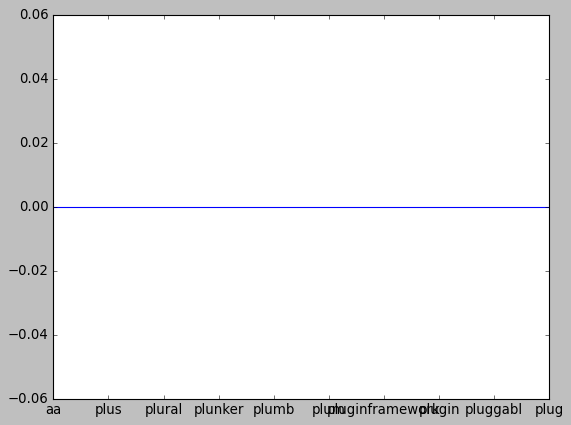

In [38]:
pd.Series(dict(zip(cv.get_feature_names(), tree.feature_importances_))).sort_values().head(10).plot()

<AxesSubplot:>

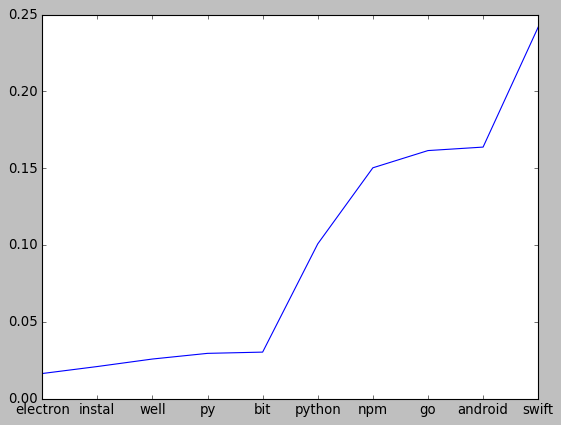

In [39]:
pd.Series(dict(zip(cv.get_feature_names(), tree.feature_importances_))).sort_values().tail(10).plot()